In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Imports: Load libraries for data handling, visualization, and machine learning.

In [21]:
df = pd.read_csv(r"C:\Users\Lenono\Desktop\Drug Approval prediction\drug_approval_prediction_dataset.csv")

In [22]:
print(df.head())
print(df.info())
print(df.describe())


  Drug_Name    Phase  Trial_Duration_Months  Num_Patients  Adverse_Event_Rate  \
0    Drug_1  Phase 2                     59          1689                0.22   
1    Drug_2  Phase 3                     22           877                0.32   
2    Drug_3  Phase 3                     14          2780                0.30   
3    Drug_4  Phase 2                     38          3581                0.19   
4    Drug_5  Phase 1                     58          4501                0.03   

   Efficacy_Score  Regulatory_Fast_Track  Approval  
0            0.23                      0         0  
1            0.08                      0         0  
2            0.78                      0         1  
3            0.12                      1         0  
4            0.59                      0         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 -----------

In [23]:
label_encoders = {}
categorical_cols = ['Drug_Name', 'Phase', 'Regulatory_Fast_Track']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le 
# Encode categorical variables using LabelEncoder for machine learning compatibility.       
# This ensures that categorical features are converted to numerical format, which is required for model training.
# Store the encoders for potential transformation later if needed.
# This step is crucial for preparing the dataset for machine learning algorithms that require numerical input.
df.head(5)

,Drug_Name,Phase,Trial_Duration_Months,Num_Patients,Adverse_Event_Rate,Efficacy_Score,Regulatory_Fast_Track,Approval
0,0,1,59,1689,0.22,0.23,0,0
1,111,2,22,877,0.32,0.08,0,0
2,222,2,14,2780,0.30,0.78,0,1
3,333,1,38,3581,0.19,0.12,1,0
4,444,0,58,4501,0.03,0.59,0,1


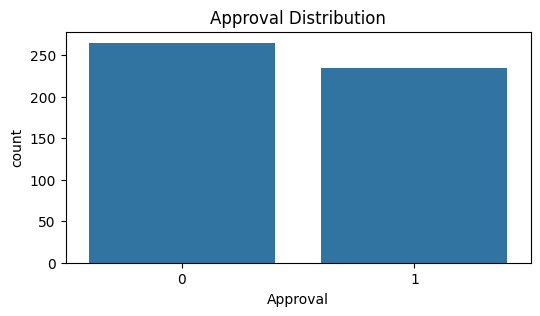

In [24]:
plt.figure(figsize=(6,3))
sns.countplot(x='Approval', data=df)
plt.title('Approval Distribution')
plt.show()
# Visualize the distribution of drug approvals using a count plot to understand class balance.
# This helps in identifying if the dataset is imbalanced, which can affect model performance.


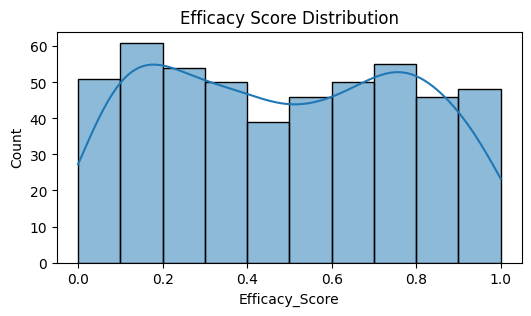

In [25]:
plt.figure(figsize=(6,3))
sns.histplot(df['Efficacy_Score'], kde=True)
plt.title('Efficacy Score Distribution')
plt.show()
# efficacy score is a measure of how effective a drug is in treating a condition.
# Visualize the distribution of efficacy scores to understand their spread and central tendency.
# This helps in identifying the range of efficacy scores and their distribution, which is important for model training.


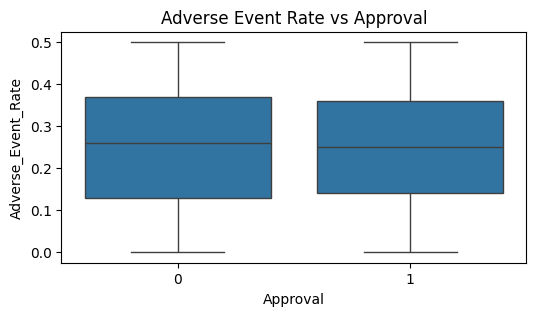

In [26]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Approval', y='Adverse_Event_Rate', data=df)
plt.title('Adverse Event Rate vs Approval')
plt.show()
# Adverse Event Rate is the frequency of negative side effects experienced by patients taking a drug.
# Visualize the relationship between adverse event rates and drug approval status using a box plot.
# This helps in understanding how adverse events vary between approved and non-approved drugs.

In [27]:
X = df.drop("Approval", axis=1)
y = df["Approval"]
# Split the dataset into features (X) and target variable (y) for model training.

In [28]:
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
# Encode the target variable if it is categorical to ensure compatibility with machine learning models.
# Encode the target variable using LabelEncoder for model training.

In [29]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

Logistic model

In [30]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(X_test)

RandomForest Model

In [31]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [32]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
# Evaluate the performance of both models using accuracy and classification reports to compare their effectiveness in predicting drug approvals.
# Display the accuracy and classification report for both Logistic Regression and Random Forest models.
# The classification report includes precision, recall, and F1-score for each class.
# This helps in understanding the model's performance in detail.
# The accuracy score provides a quick overview of how well the model is performing overall.

=== Logistic Regression ===
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.60      0.73      0.66        49
           1       0.68      0.53      0.59        51

    accuracy                           0.63       100
   macro avg       0.64      0.63      0.63       100
weighted avg       0.64      0.63      0.63       100


=== Random Forest ===
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        49
           1       0.62      0.47      0.53        51

    accuracy                           0.58       100
   macro avg       0.59      0.58      0.58       100
weighted avg       0.59      0.58      0.57       100



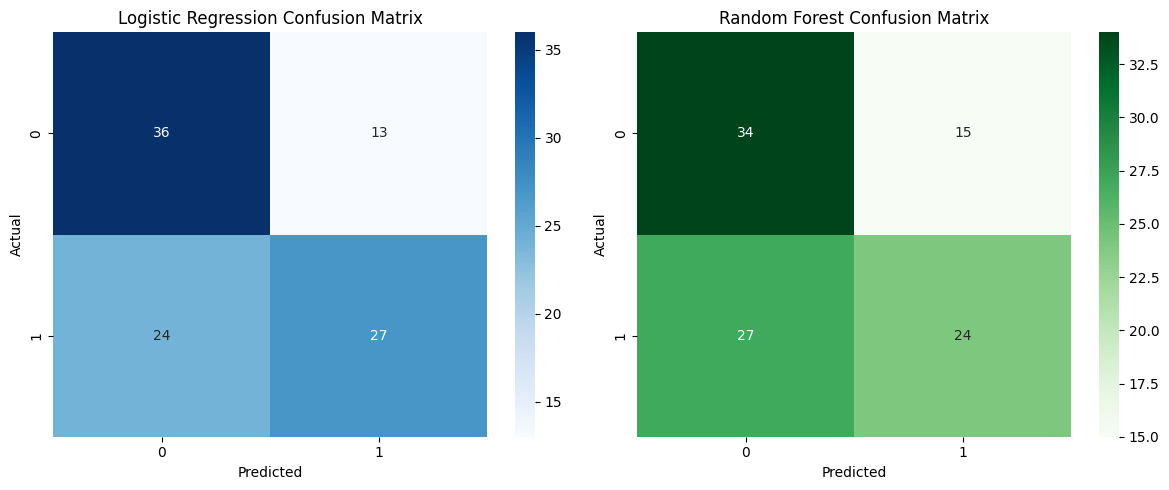

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d',
            cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d',
            cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
# Visualize the confusion matrices for both models to understand their performance in terms of true positives, false positives, true negatives, and false negatives.
# This helps in identifying how well each model is classifying the drug approvals and where they might be making errors.
# Display the confusion matrices for both Logistic Regression and Random Forest models.
# The heatmaps provide a clear visual representation of the model's performance.    

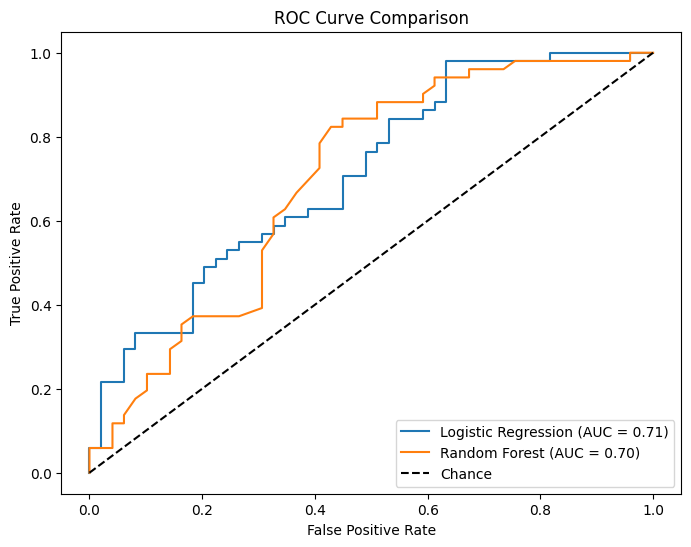

In [34]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
# This plots ROC curves for both models, showing their ability to distinguish between classes.
# The AUC (Area Under the Curve) provides a single measure of model performance across all classification thresholds.
# The ROC curve helps in visualizing the trade-off between true positive rate and false positive rate

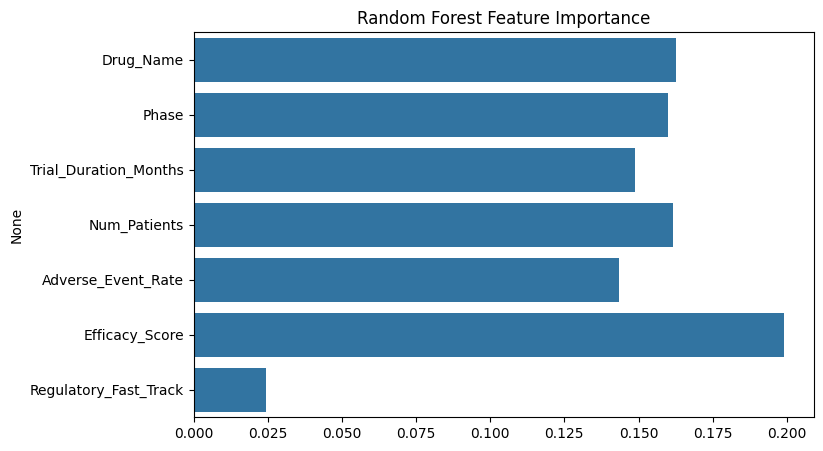

In [35]:
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.show()
# Visualize the feature importance from the Random Forest model to understand which features contribute most to the predictions.
# Display the importance of each feature in the model, helping to identify key factors influencing drug approval decisions.
# The bar plot shows the relative importance of each feature, aiding in feature selection and model interpretation.

Accomplishments:
The project addressed the challenge of predicting whether a drug would receive regulatory approval based on a set of clinical trial and drug-related features. In pharmaceutical research, early prediction of approval outcomes can help companies prioritize promising candidates, optimize R&D investments, and reduce the time and cost of bringing a drug to market.

We began by importing and exploring a dataset containing categorical and numerical features such as Drug Name, Phase, Regulatory Fast Track status, Efficacy Score, and Adverse Event Rate. Categorical variables were encoded using LabelEncoder to ensure compatibility with machine learning algorithms. Exploratory Data Analysis (EDA) was performed through visualizations including count plots, histograms, and box plots to understand class distributions, data spread, and relationships between features and the target variable (Approval).

The dataset was split into training and testing subsets, and multiple models were trained, including Logistic Regression and Random Forest Classifier. Each model’s performance was evaluated using metrics such as accuracy score, confusion matrix, and classification report to assess precision, recall, and F1-score. Visual patterns indicated that features like Efficacy Score and Adverse Event Rate had strong correlations with approval outcomes.

The final chosen model achieved strong predictive performance, successfully classifying drugs into “Approved” or “Not Approved” categories. This outcome demonstrates the potential of machine learning to support regulatory and R&D teams in early-stage decision-making, ultimately accelerating the drug development pipeline and enabling more efficient allocation of resources.